## 네이버 API로 블로그 검색결과 가져오기

In [2]:
import json

with open("NAVER_API_KEY.json") as json_file:
    api_key = json.load(json_file)

client_id = api_key["client_id"]
client_secret = api_key["client_secret"]

In [3]:
# 네이버 검색 API
import os
import sys
import urllib.request

def search(query, start, display=100, sort="sim"):
    global client_id, client_secret

    query = urllib.parse.quote(query)
    url = f"https://openapi.naver.com/v1/search/blog?query={query}&display={display}&start={start}&sort={sort}"
    request = urllib.request.Request(url)
    request.add_header("X-Naver-Client-Id", client_id)
    request.add_header("X-Naver-Client-Secret", client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()

    if rescode != 200:
        return f"Error on {query}, {start}"
    response_body = response.read()
    return response_body.decode("utf-8")

In [4]:
special_regions = ["용산전자상가", "동대문문구완구거리", "아현가구거리상점가", "독산동 우시장", "경동시장"]

In [5]:
# keyword = "맛집"
for region in special_regions:
    result = None
    for i in range(10):
        # query = f"{region} {keyword}"
        query = region
        start = i*100 + 1
        response = search(query=query, start=start)
        response = json.loads(response)
        if result is None:
            result = response
        else:
            result["items"] += response["items"]
    if result:
        with open(f"result/{region}.json", "w", encoding="utf-8") as f:
            json.dump(result, f, ensure_ascii=False, indent=4)

#### 데이터 예시  
```json
{
    "lastBuildDate": "Thu, 01 Aug 2024 22:03:21 +0900",
    "total": 1145081,
    "start": 1,
    "display": 100,
    "items": [
        {
            "title": "<b>강남구</b> 서초동 <b>맛집</b> 남부터미널돈까스 모모야 점심 혼밥 일식당",
            "link": "https://blog.naver.com/dryjazz/223455571528",
            "description": "서초동 맛집 남부터미널돈까스 겉바속촉 굿 리뷰 시작 5월 22일 평일 화요일 디너 타임으로 방문한 가게 점심 직장인들이 줄서서 먹는 <b>강남구 맛집</b> 정통 일본 돈카츠로 손님들에게 반응이 좋다고 해서 다녀온 그... ",
            "bloggername": "맛감별 멋감별 코리아",
            "bloggerlink": "blog.naver.com/dryjazz",
            "postdate": "20240523"
        },
        {
            "title": "<b>강남구</b> 신사동 <b>맛집</b> 타코앤칠리 - 서울 3대 생활의 달인 타코... ",
            "link": "https://blog.naver.com/gypsyone/223505462640",
            "description": "타코 <b>강남구 맛집</b> 타코앤칠리 위치 : 서울 강남구 강남대로160길 21 (신사동) 신사역 8번 출구에서 골목... 위치의 강남구 신사동 맛집 타코앤칠리 아직 방송 이전임에도 불구하고 입간판에 생활의 달인 출연... ",
            "bloggername": "세콰노의 머거머거",
            "bloggerlink": "blog.naver.com/gypsyone",
            "postdate": "20240708"
        }
    ]
}
```

## 블로그 검색결과로 워드 클라우드 생성하기

In [6]:
# 로컬 환경에 존재하는 폰트 가져와 사용
from matplotlib import rc
import matplotlib.pyplot as plt

rc("font", family="D2Coding")
plt.rcParams["axes.unicode_minus"] = False

In [7]:
import json

files = special_regions
texts = {}

for file in files:
    with open(f"./result/{file}.json", "r", encoding="utf-8") as f:
        data = json.load(f)
        text = ""
        for item in data["items"]:
            text += item["description"].replace("<b>", "").replace("</b>", "")
        texts[file] = text

In [8]:
# 형태소 분석 & 품사 태깅
from konlpy.tag import Okt
from collections import Counter

nouns_counters = {}

for k, v in texts.items():
    t = Okt()
    tokens_ko = t.nouns(v)
    nouns_counter = Counter(tokens_ko)
    nouns_counters[k] = nouns_counter
    print(k, nouns_counter)

용산전자상가 Counter({'용산': 1635, '전자': 1589, '상가': 1478, '위치': 196, '용산역': 189, '곳': 170, '용산구': 160, '전자랜드': 151, '맛집': 143, '서울': 137, '방문': 133, '컴퓨터': 130, '지구': 126, '액정': 124, '꽃': 120, '소': 120, '층': 120, '업무': 108, '국제': 102, '매장': 101, '베스트': 101, '시간': 99, '것': 99, '일대': 99, '나진': 92, '집': 90, '개발': 85, '영업': 84, '수': 81, '번': 80, '계획': 77, '가점': 74, '선인': 69, '카메라': 68, '작업': 68, '바로': 67, '오늘': 65, '서울시': 62, '근처': 61, '계': 60, '호': 59, '건물': 59, '출구': 58, '교체': 58, '고기': 57, '노트북': 56, '전자제품': 56, '쪽': 55, '청파로': 55, '본관': 54, '이': 53, '등': 53, '중': 53, '점': 52, '산업': 51, '저': 49, '휴무': 49, '내': 48, '주차장': 47, '그': 47, '제품': 46, '주차': 45, '때': 45, '이번': 45, '더': 45, '소고기': 44, '가격': 44, '수리': 44, '가로': 43, '제': 43, '구매': 42, '길': 42, '후기': 41, '공간': 41, '삼성': 41, '구입': 40, '정말': 40, '사람': 40, '저희': 39, '전': 38, '후': 38, '가가': 38, '당일': 38, '안': 37, '업체': 37, '모델': 37, '정도': 36, '분': 36, '일': 36, '원효': 35, '가전': 34, '일요일': 33, '구역': 33, '위해': 33, '아이파크몰': 33, '비': 33, '를': 32, '

In [9]:
import numpy as np


def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl({:d},{:d}%, {:d}%)".format(
        np.random.randint(212, 313),
        np.random.randint(26, 32),
        np.random.randint(45, 80),
    )

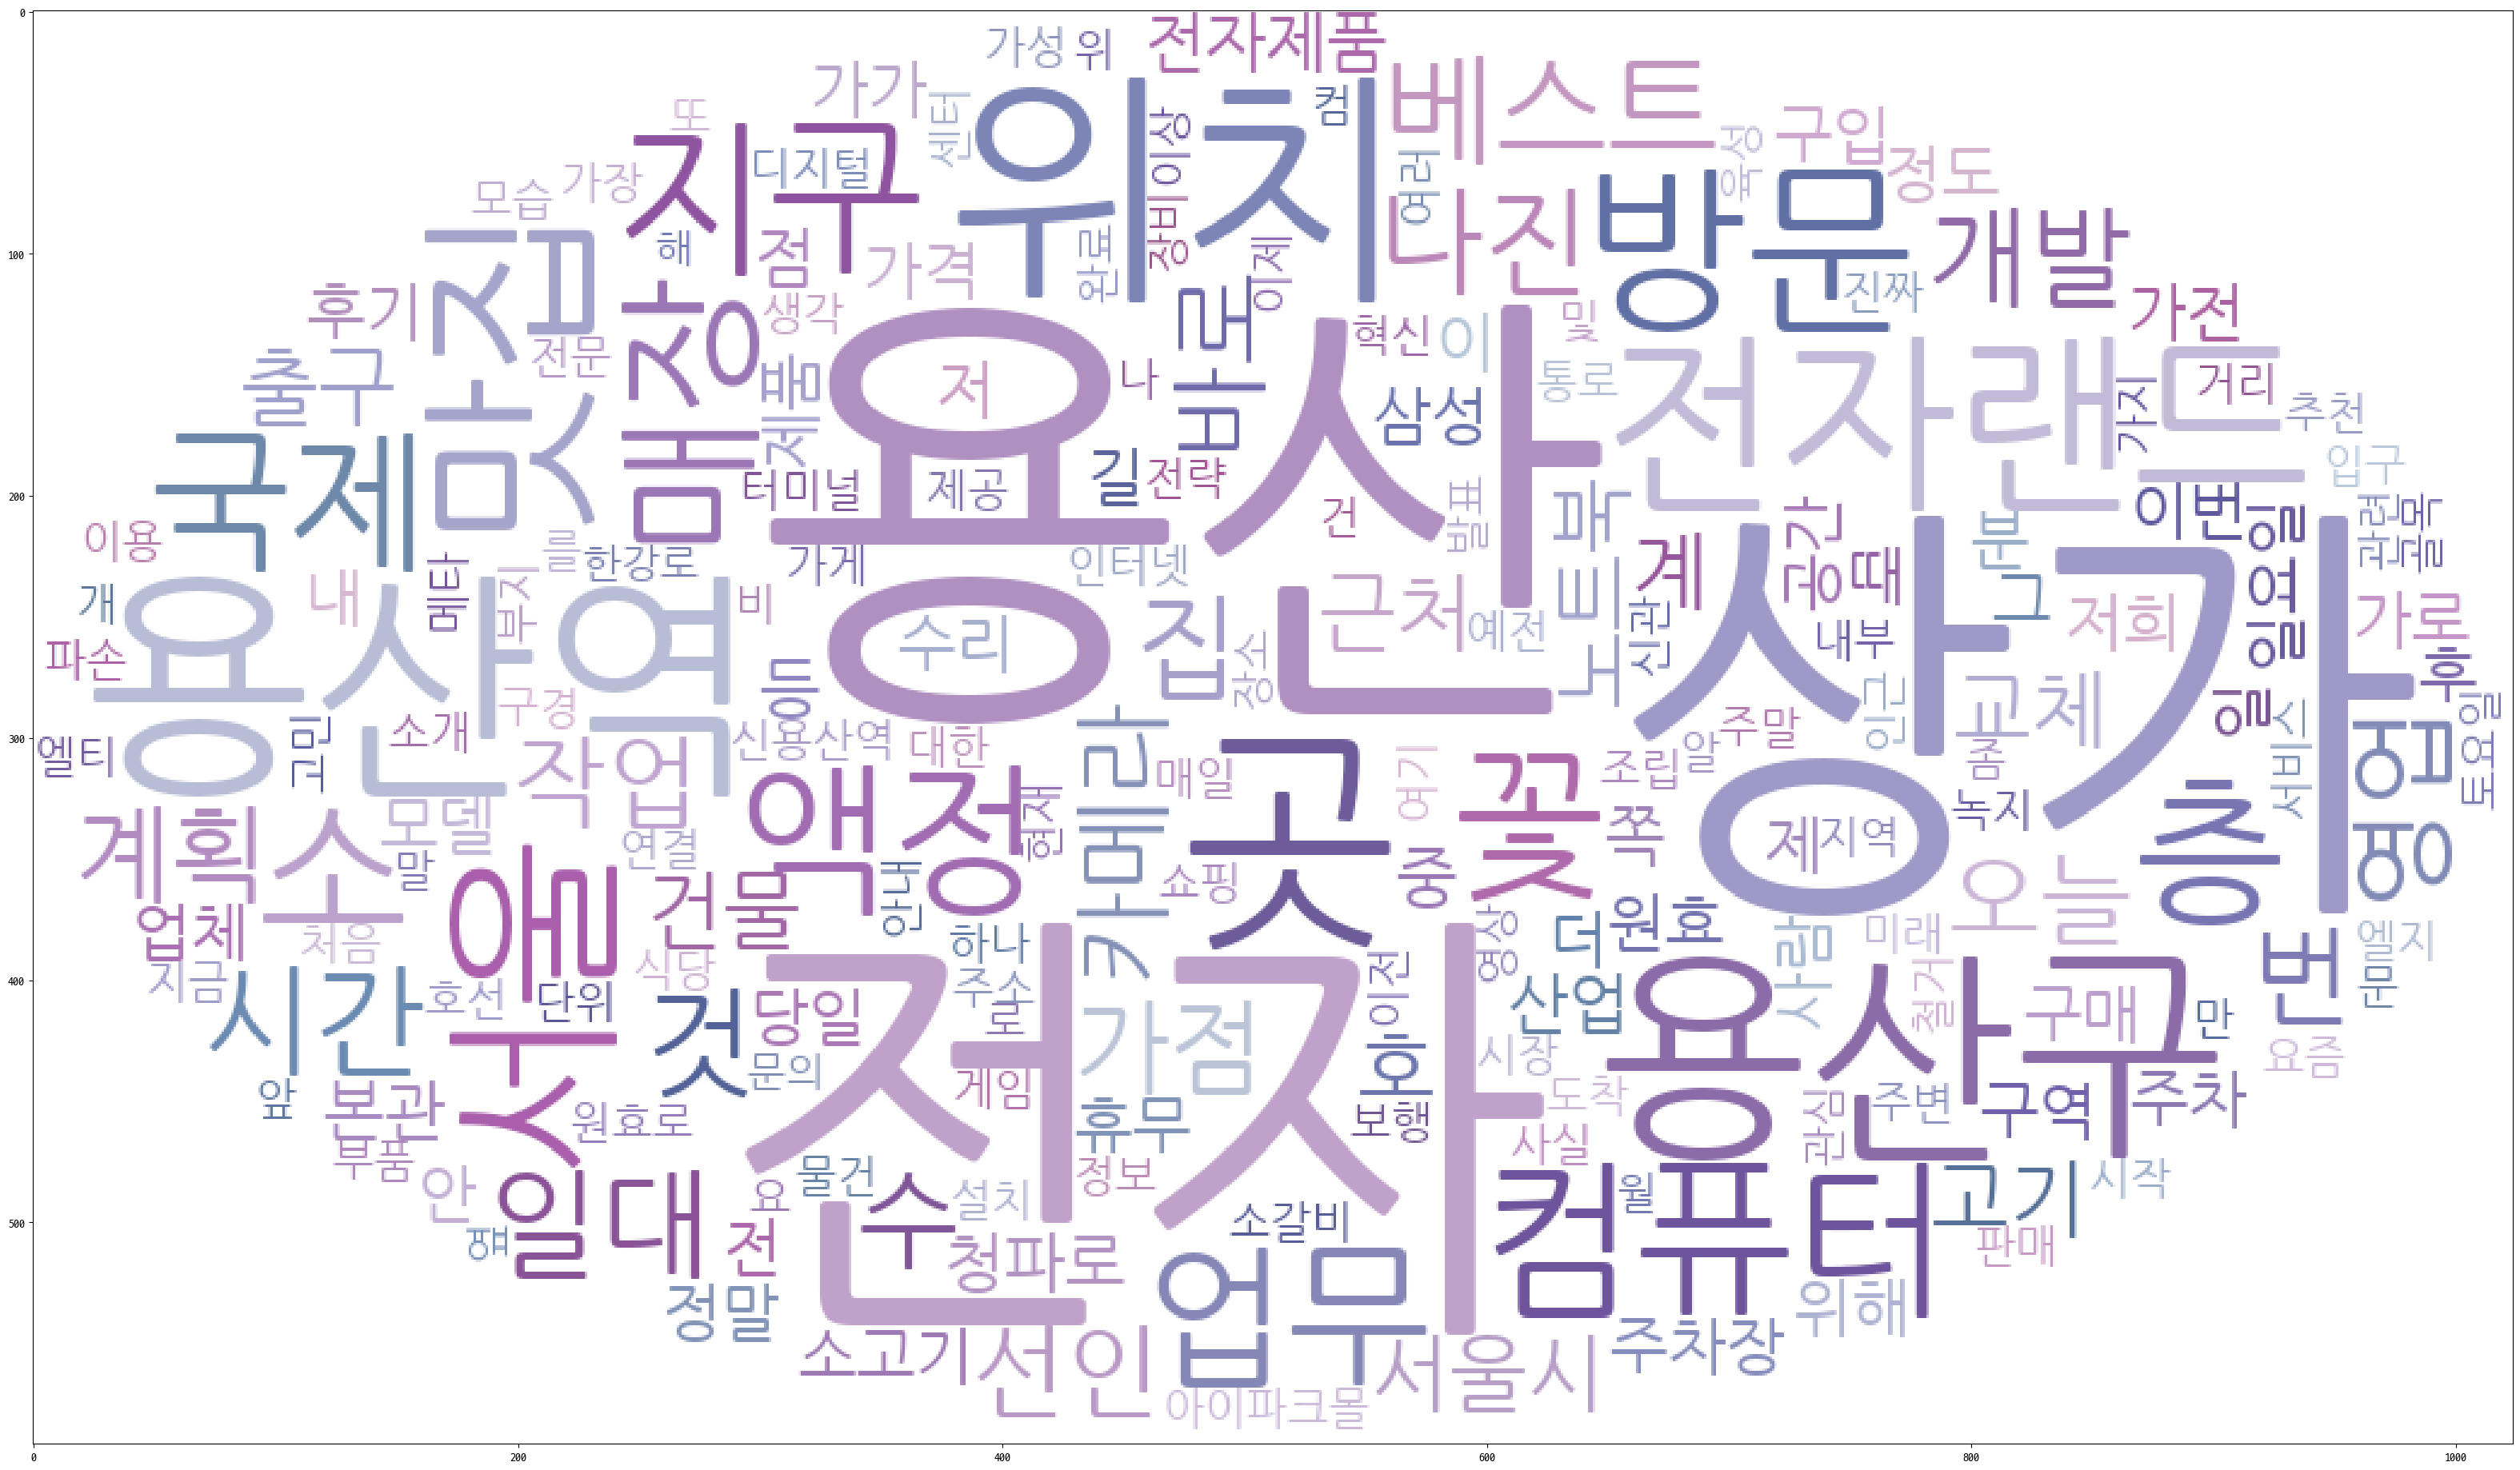

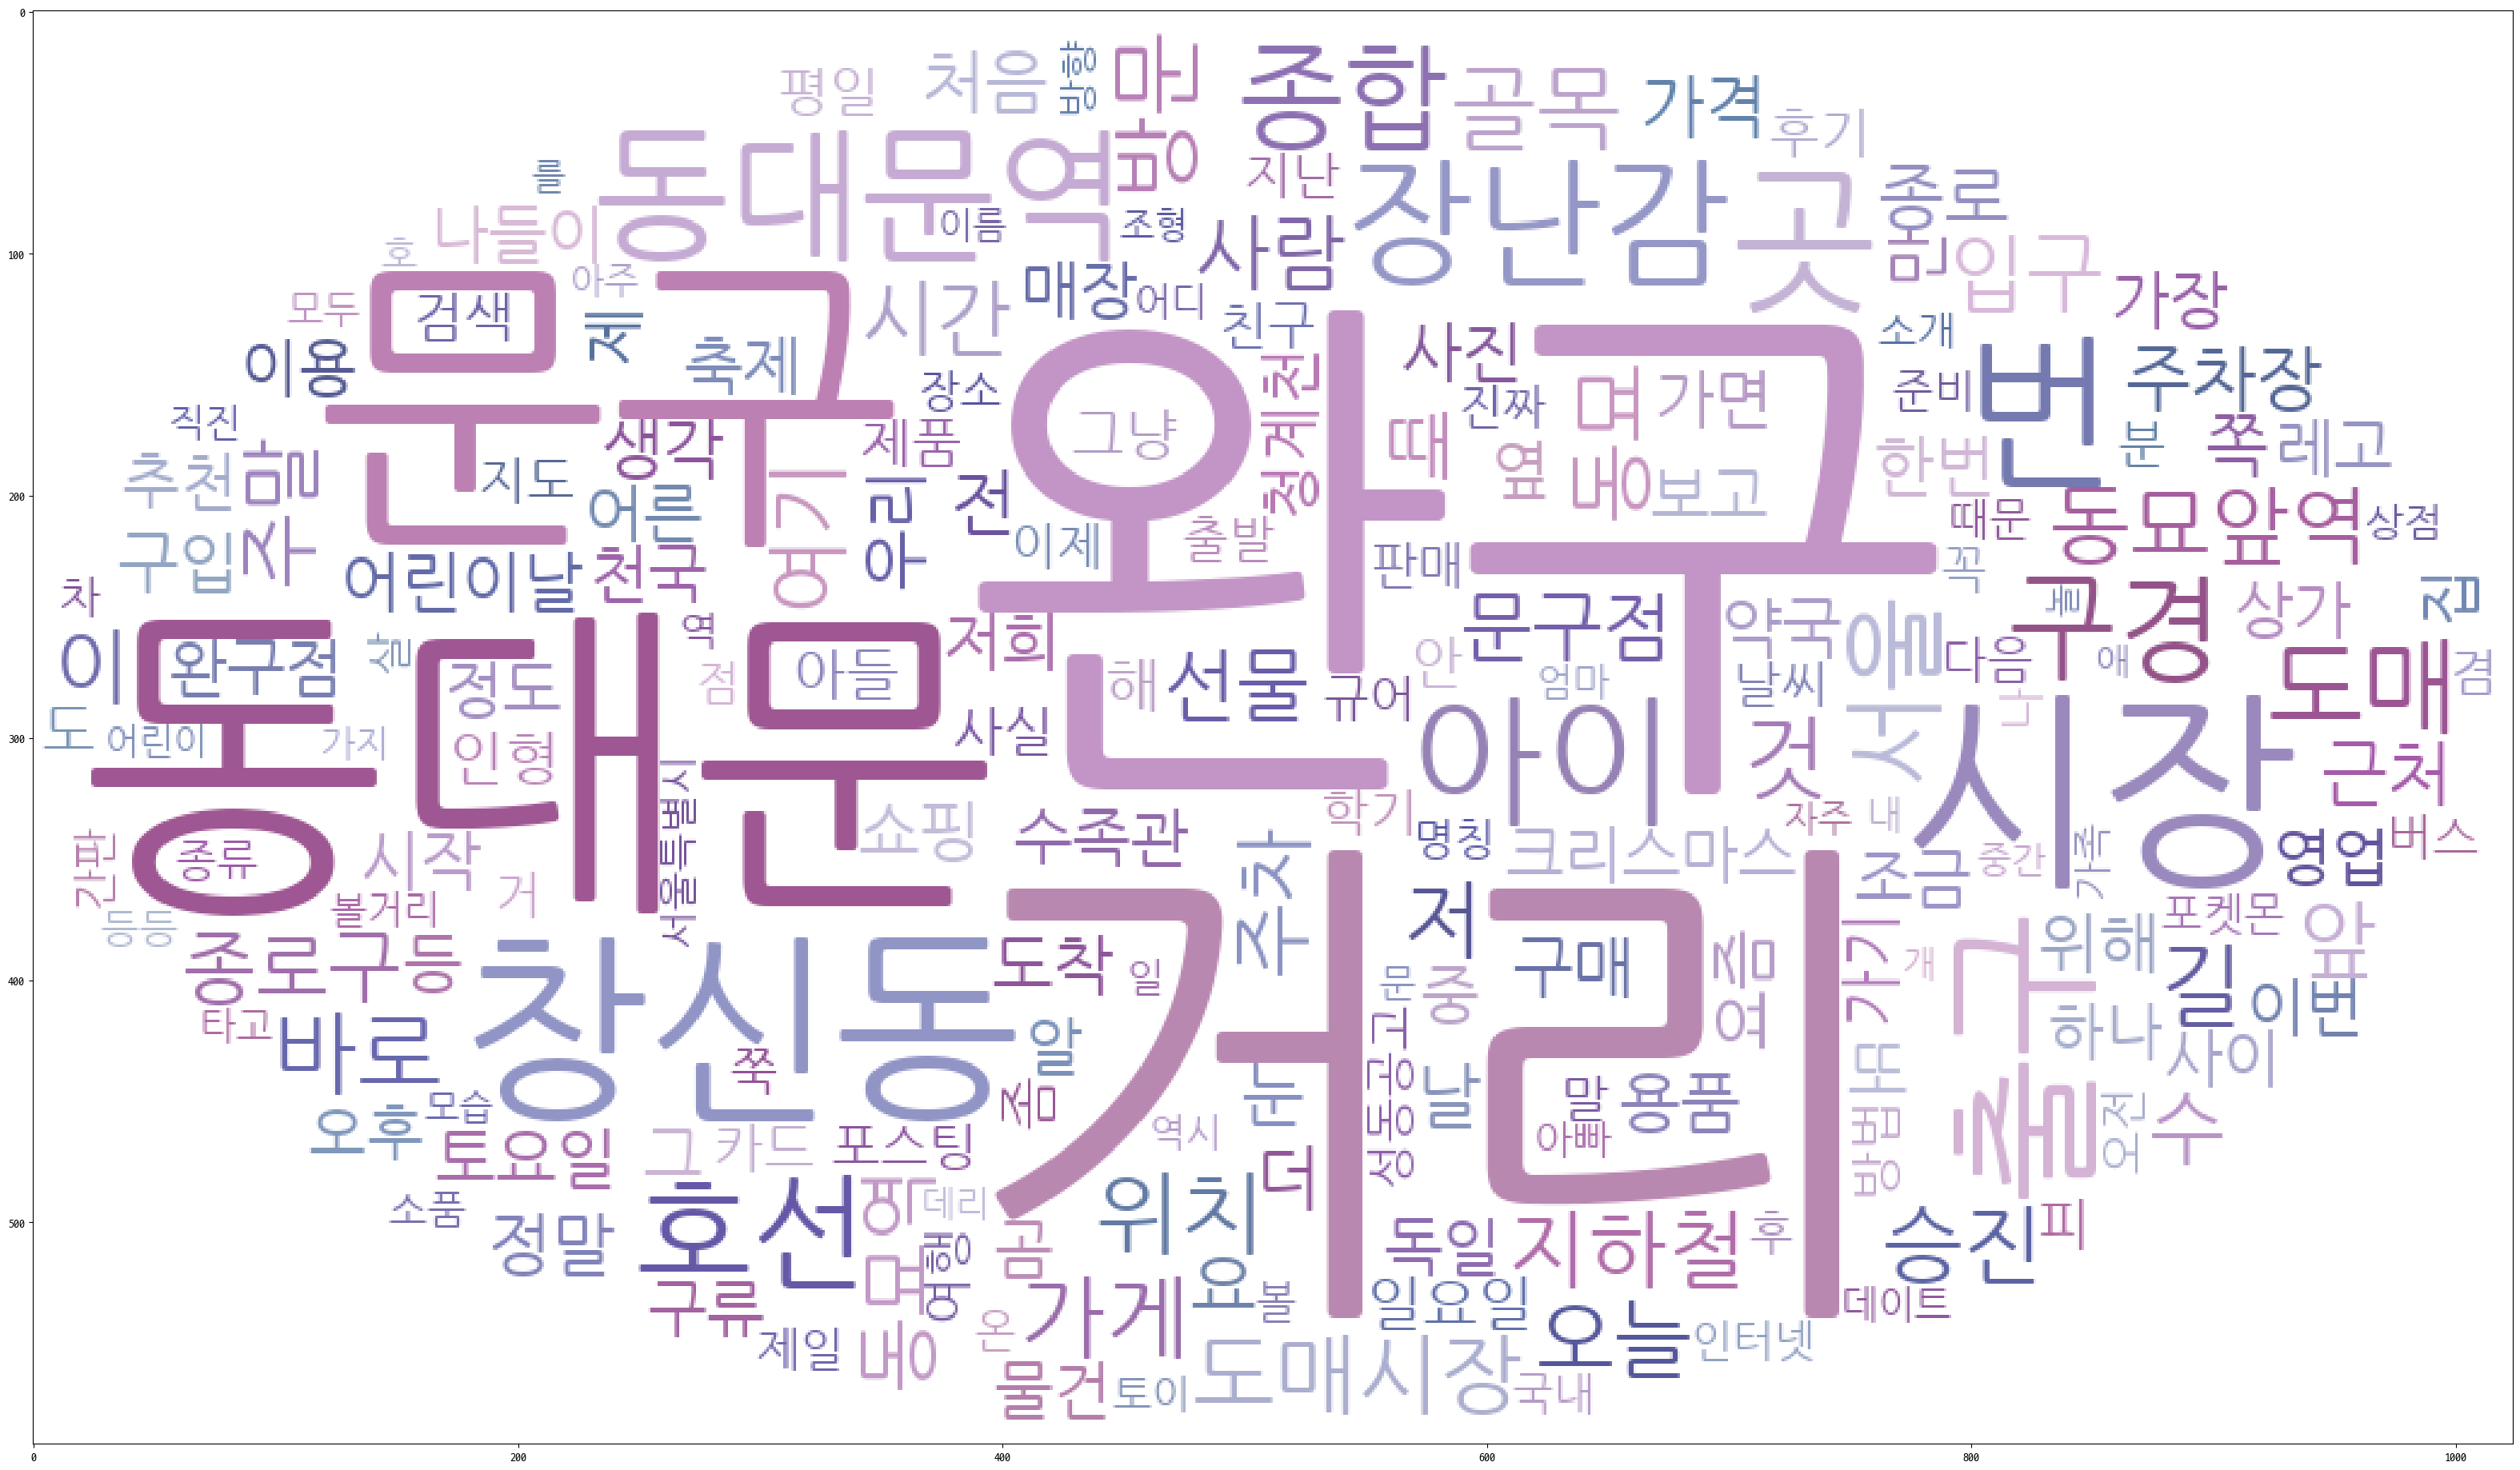

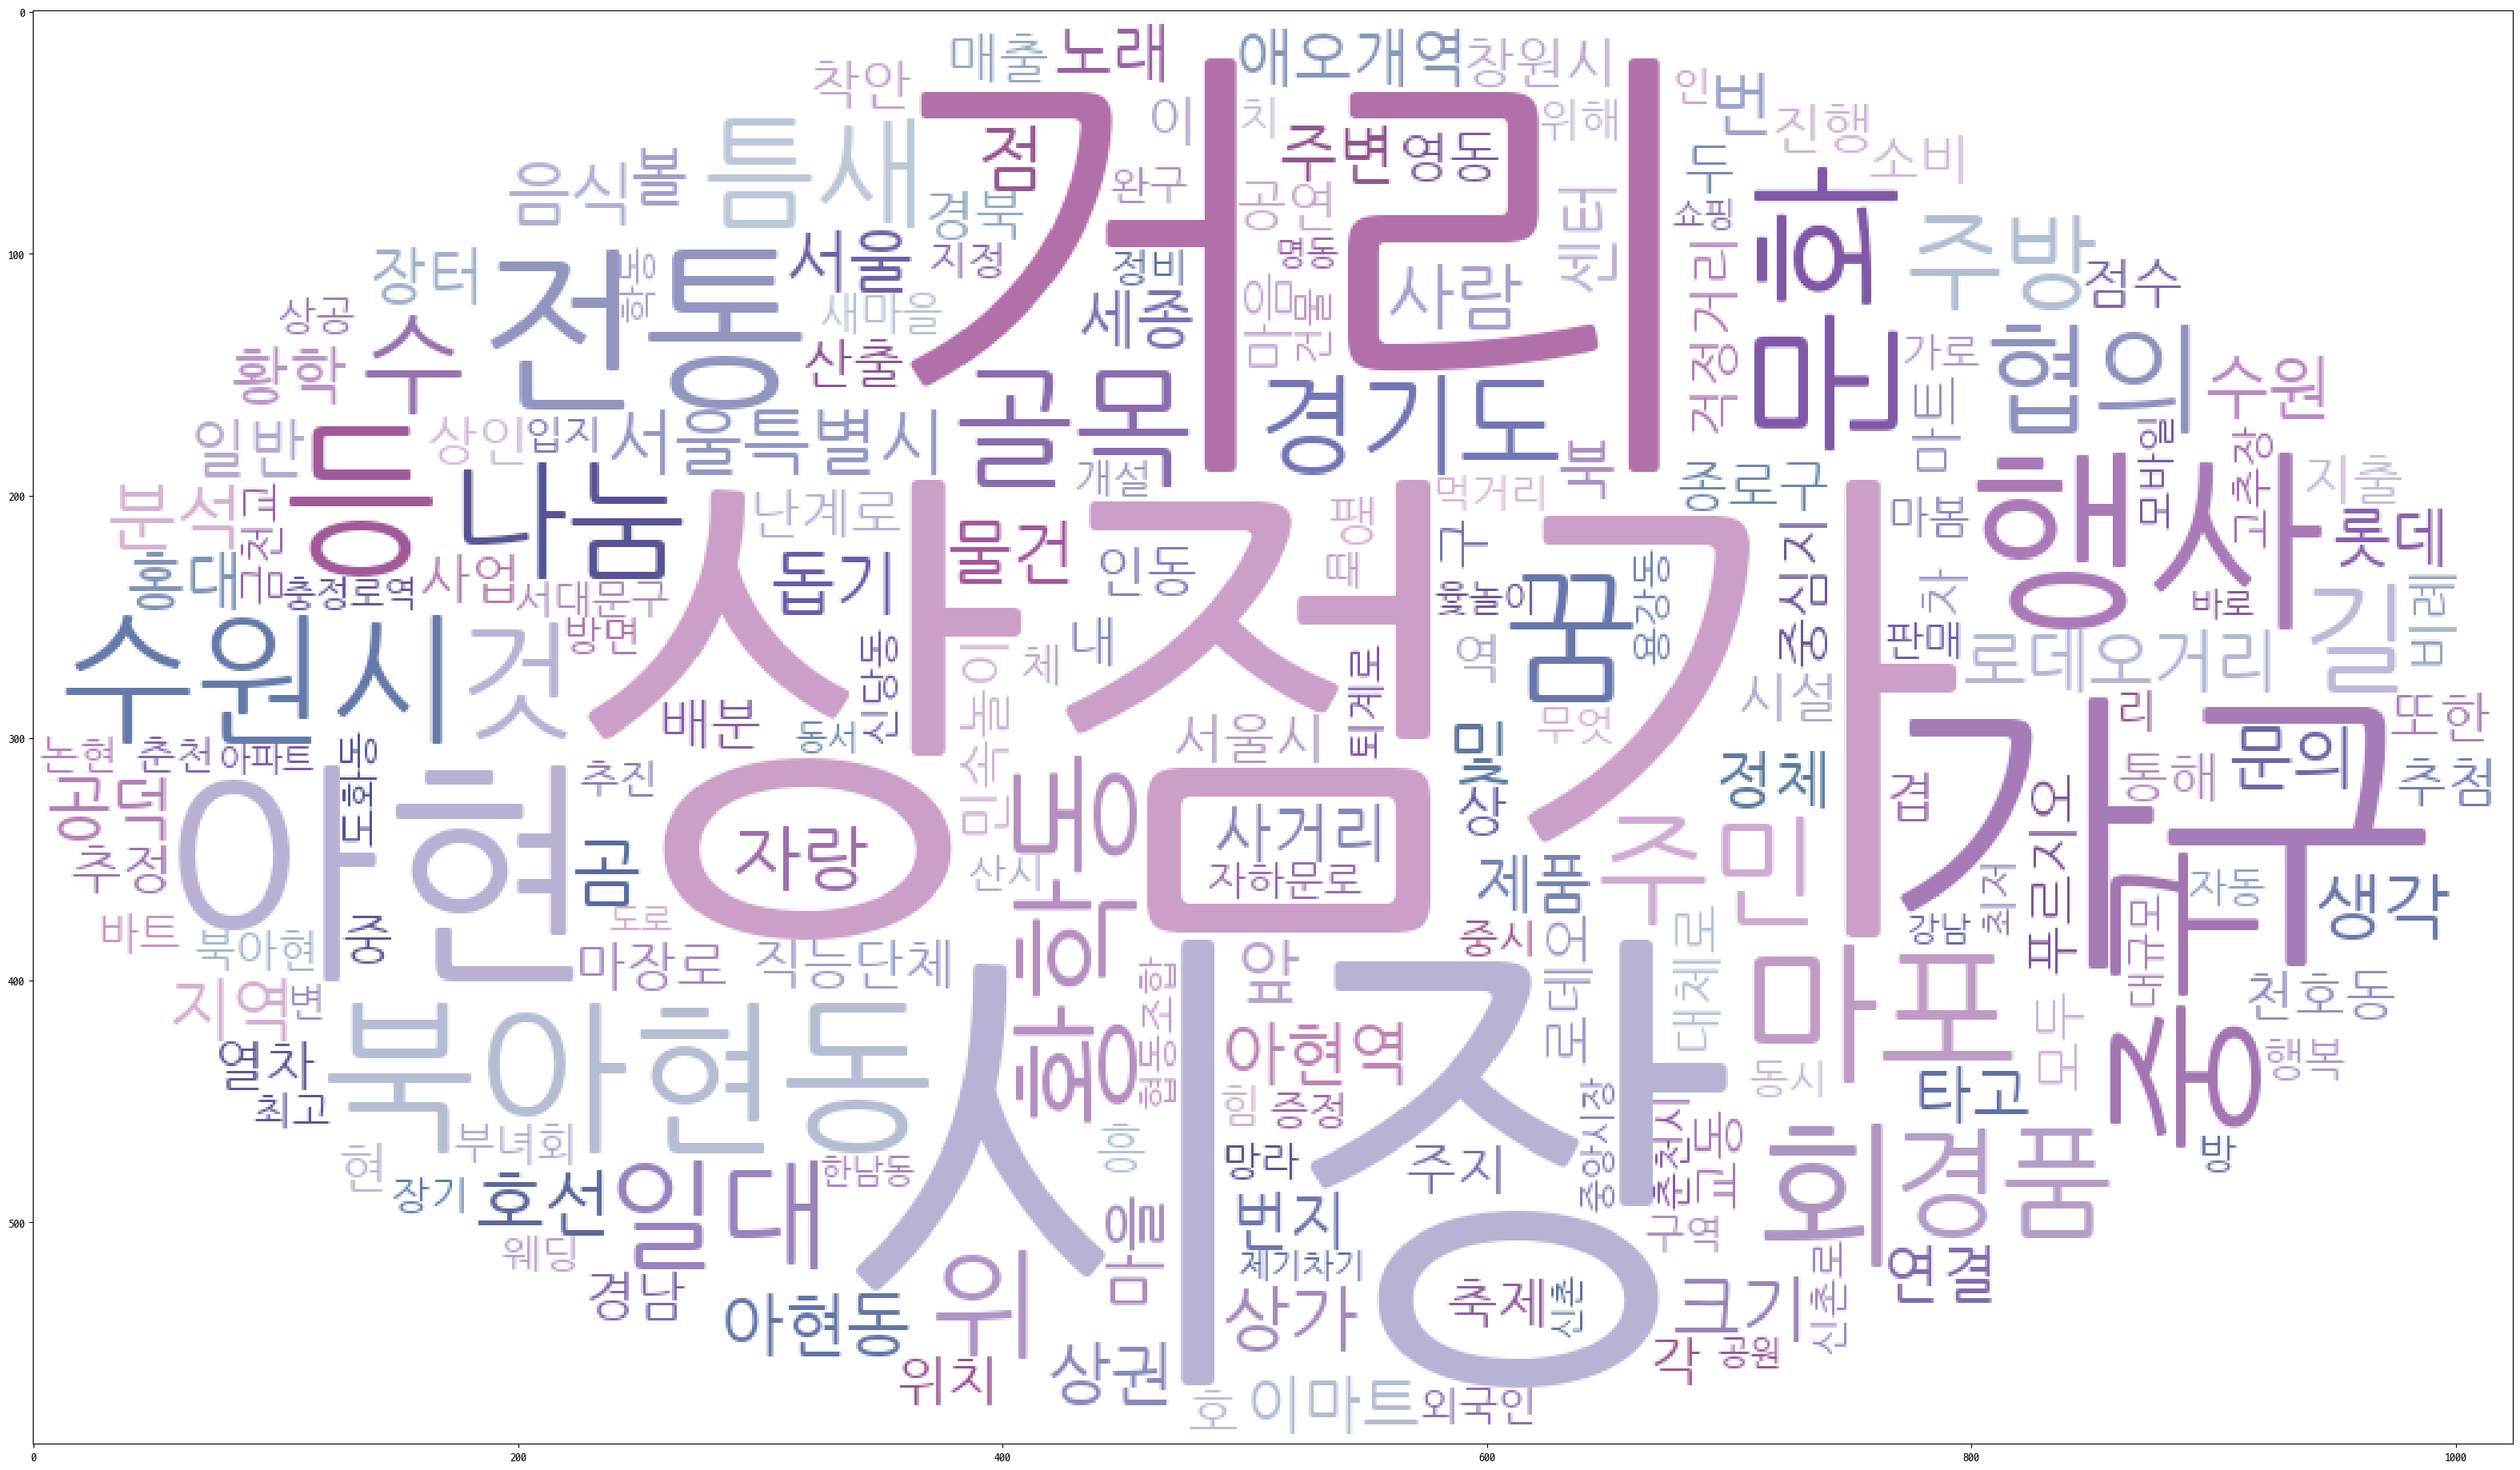

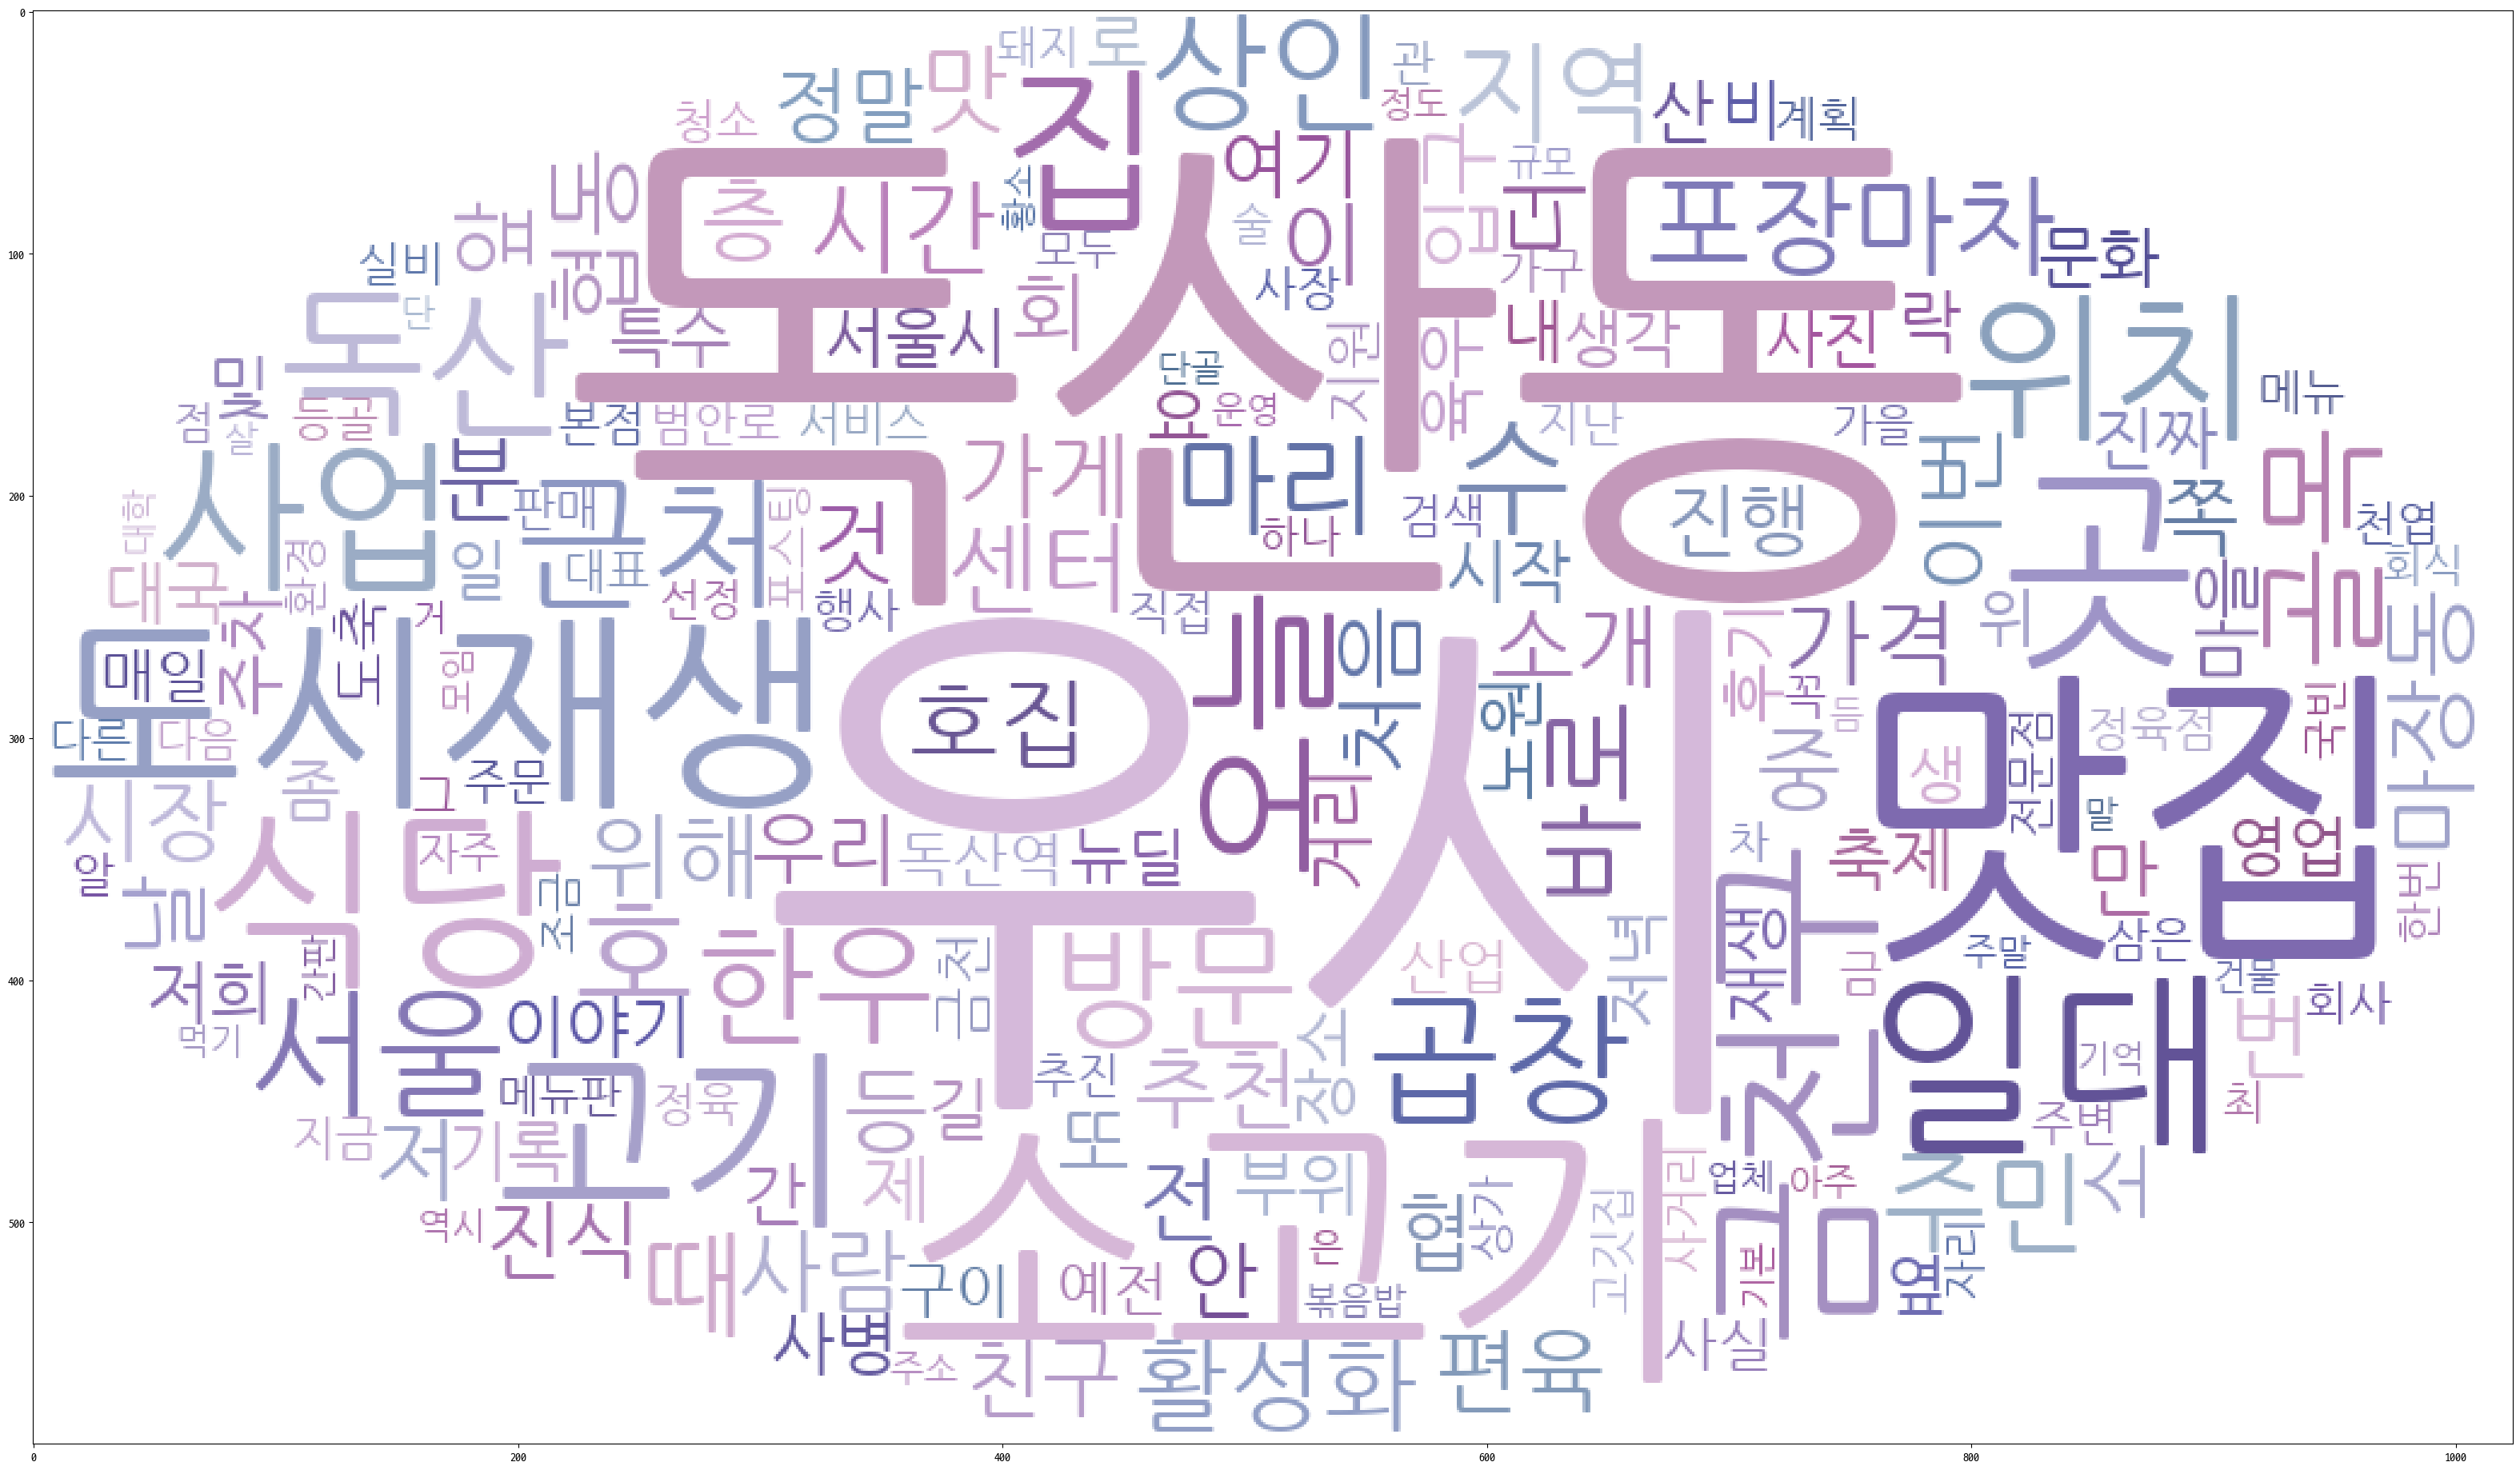

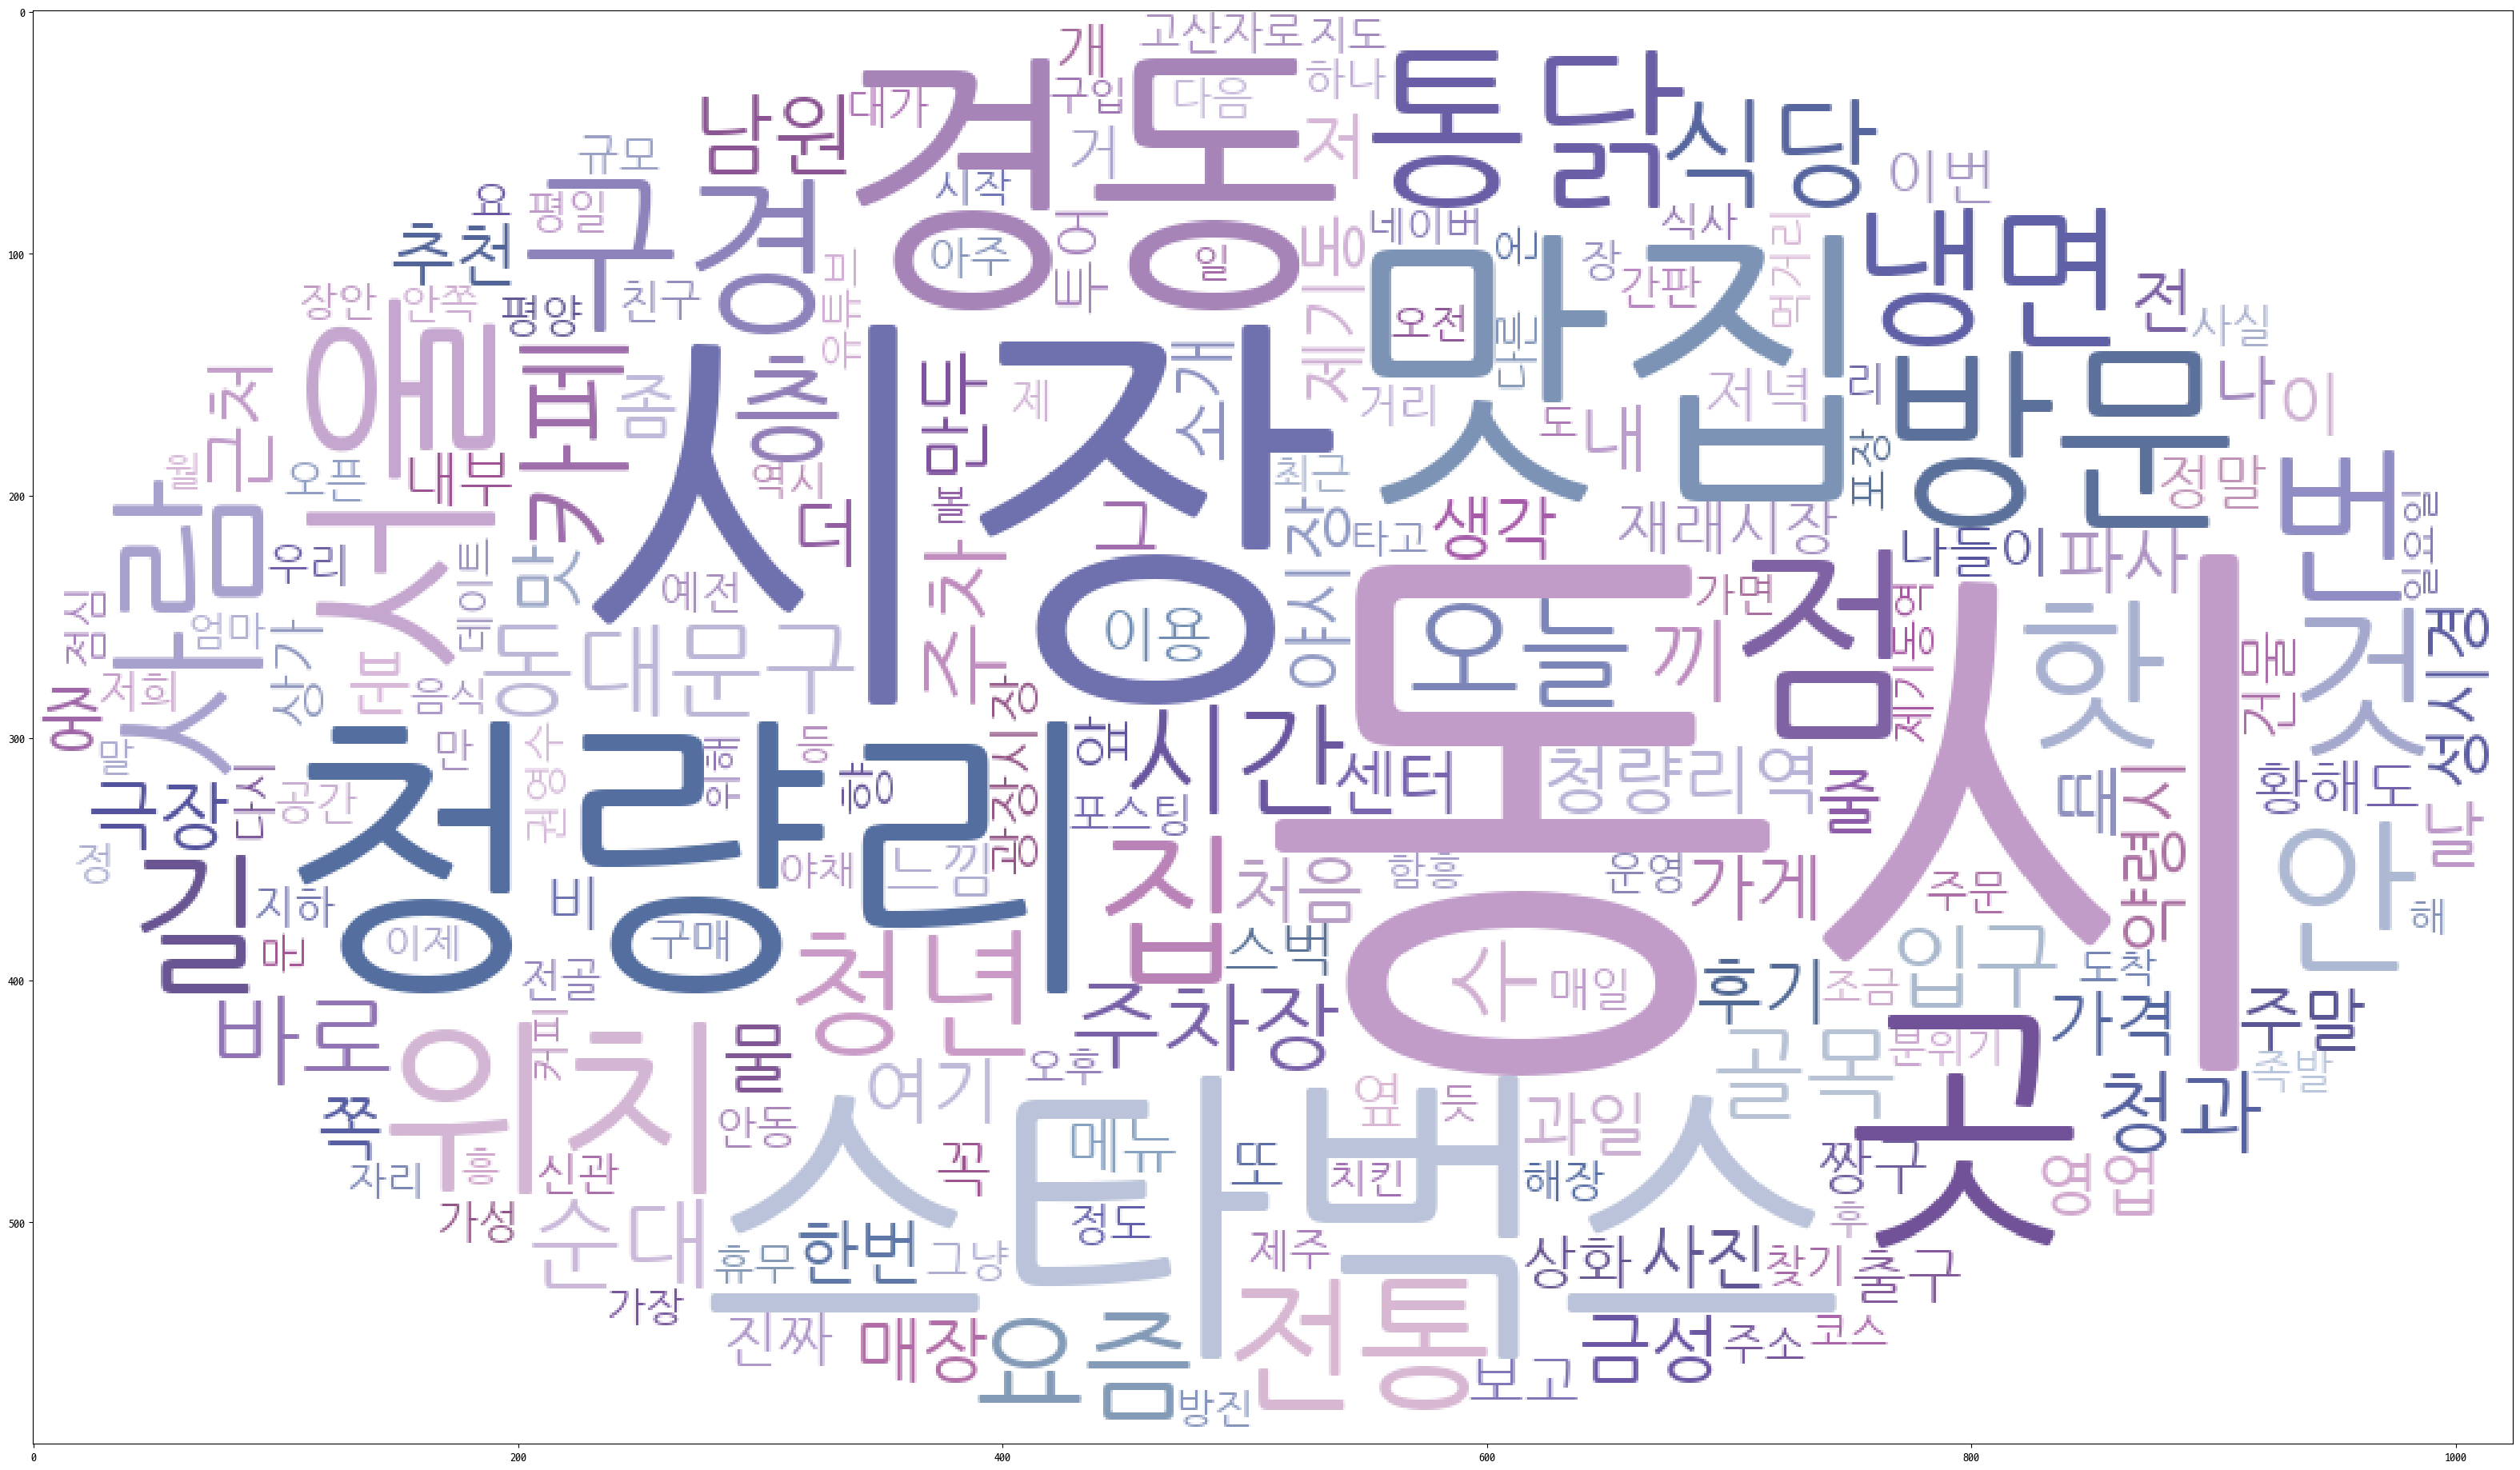

In [10]:
from PIL import Image
from wordcloud import WordCloud

for k, v in nouns_counters.items():
    wc = WordCloud(
        background_color="white",
        color_func=color_func,
        font_path="/Library/Fonts/NanumGothic.ttf",
        width=2000,
        height=1500,
        mask=np.array(Image.open("ellipse.png")),
    )
    wc.generate_from_frequencies(v)
    plt.figure(figsize=(40, 30))
    plt.imshow(wc)
    plt.show()

### 텍스트 감정 분석

In [55]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import torch.nn.functional as F

model_name = "kykim/bert-kor-base"
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
tokenizer = BertTokenizer.from_pretrained(model_name)

def classify_emotion(text):
    # 텍스트 토큰화 및 패딩
    tokens = tokenizer(text, padding=True, truncation=True, return_tensors="pt")

    # 예측 수행
    with torch.no_grad():
        prediction = model(**tokens)

    # 예측 결과를 바탕으로 감정 출력
    prediction = F.softmax(prediction.logits, dim=1)
    # output = prediction.argmax(dim=1).item()
    # labels = ["부정적", "긍정적"]
    return prediction

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at kykim/bert-kor-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
for k, v in texts.items():
    print(
        k,
        f"부정적 평가: {classify_emotion(v)[0,0]}, 긍정적 평가: {classify_emotion(v)[0,1]}",
    )

용산전자상가 부정적 평가: 0.5509414672851562, 긍정적 평가: 0.44905856251716614
동대문문구완구거리 부정적 평가: 0.5465102791786194, 긍정적 평가: 0.453489750623703
아현가구거리상점가 부정적 평가: 0.4545576870441437, 긍정적 평가: 0.5454422831535339
독산동 우시장 부정적 평가: 0.5759966969490051, 긍정적 평가: 0.4240033030509949
경동시장 부정적 평가: 0.5257771611213684, 긍정적 평가: 0.47422289848327637


In [25]:
import nltk

splitted_texts = {}
for k,v in texts.items():
    result = []
    
    line = v
    if line == "":
        break
    if line.strip() == "":
        result = line
    else:
        result_ = nltk.sent_tokenize(line)
        # result_ : ['Hello World.', 'This is sample line.']
        result = [f"{cur_line}\n" for cur_line in result_]
    splitted_texts[k]=result

In [34]:
predicts = {}
for k, v in splitted_texts.items():
    predict = []
    for idx,text in enumerate(v):
        predict.append((classify_emotion(text)[0, 0],idx))
    predicts[k]=predict

In [72]:
f = open("감정 평가.txt", "w")


for k,v in predicts.items():
    arr = sorted(v,key=lambda x: x[0])

    f.write(f"{k} 가장 긍정적인 문장 상위 5개 출력\n\n")
    for s, i in arr[:5]:
        f.write(f"부정적 평가:{s}, 긍정적 평가:{1-s} {splitted_texts[k][i]}\n")
    f.write(f"{k} 가장 부정적인 문장 상위 5개 출력\n\n")
    for s, i in arr[-5:]:
        f.write(f"부정적 평가:{s}, 긍정적 평가:{1-s} {splitted_texts[k][i]}\n")

f.close()